<a href="https://colab.research.google.com/github/mateocapon/simulacion_tp1/blob/main/TP2_Ejercicio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 4

Se desea simular la evolución de una epidemia utilizando el modelo S.I.R.
Se conoce que inicialmente el 3% de la población se encuentra infectada, toda la población es susceptible de
contagiarse, la tasa de transmisión β=0,27, y la tasa de recuperación γ = 0,043


Se pide:
- Implementar el modelo SIR correspondiente.
- Graficar las curvas de porcentajes de personas sanas, infectadas y recuperadas, de forma que se vea la evolución
de la epidemia.
- Sabiendo que el sistema de salud puede asistir cómo máximo sólo al 30% de la población a la vez, determine la
duración total de la epidemia si se quiere que el pico máximo de infectados no supere las capacidades de
asistencia médica. ¿Qué parámetros modifica? ¿Por qué?


Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.

#Modelo SIR


##Variables 

S(t): Susceptibles

I(t): Infectados

R(t): Recuperados 

Infectados iniciales: 3%

Susceptibles iniciales: 100% (toda la población)

Recuperados iniciales: 0%

## Ecuaciones Diferenciales del Modelo


$ \frac{\mathrm dS} {\mathrm dt} = -\beta SI\ $

$ \frac{\mathrm dI} {\mathrm dt} = \beta SI-\gamma I\ $

$ \frac{\mathrm dR} {\mathrm dt} = \gamma I\ $


##Parametros

$ \beta $ : tasa de transmisión

$ \gamma $: tasa de recuperación

$ \frac{1} {\gamma} $: período medio de recuperación 

### Valores

$ \gamma = 0.043 $

$ \beta = 0.27 $

Entonces el periodo medio de recuperacion es de : $ \frac{1} {\gamma} =  \frac{1} {0.043} = 23.25$ ¿¿ dias o que??

##Implementacion del modelo del SIR utilizando RK4

In [195]:
# RK4
import numpy as np

def modelo_SIR(x, beta, gamma, n):
  #x(0) = S, x(1) = I,  x(2) = R
  xp = np.zeros((3, 1))
  xp[0] = -beta*x[0][n-1]*x[1][n-1]
  xp[1] = beta*x[0][n-1]*x[1][n-1] - gamma*x[1][n-1]
  xp[2] = gamma*x[1][n-1]

  return xp


def RK4(  x0, h, T , beta, gamma):
  t0 = T[0]
  tf = T[len(T)-1]

  N = round((tf-t0)/h) #Numero de pasos total
  t = np.zeros(N)

  x = np.zeros((3, N))

  t[0] = t0

  x=np.array(np.zeros((3, N)))
  x = np.delete(x, 0, axis=1)
  x = np.insert(x,0,x0,axis=1)
  
  for n in range(1, N):

    k1 = h* modelo_SIR( x, beta, gamma, n)
    k2 = h* modelo_SIR( x + 0.5*k1,beta, gamma, n)
    k3 = h* modelo_SIR( x + 0.5*k2, beta, gamma,n)
    k4 = h* modelo_SIR( x + k3, beta, gamma,n)

    k=(1/6)*(k1 + 2*k2 + 2*k3 + k4)

    for i in range(0, 3):
      x[i][n]=x[i][n-1]+k[i]

    t[n] = t[n-1] + h

  return x



##Simulacion de la epidemia

In [196]:
import matplotlib.pyplot as plt

def graficar_curvas(I,S,R,M):
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(M, color = 'black', label = 'Capacidad Sistema Medico')
  ax.plot(S, color = 'blue', label = 'Susceptibles')
  ax.plot(I, color = 'red', label = 'Infectados')
  ax.plot(R, color = 'green', label = 'Recuperados')
  plt.title("Evolucion de Enfermedad")
  ax.set_xlabel('Dias')
  ax.set_ylabel('Poblacion')
  plt.legend()
  plt.grid()
  plt.show()


Grafico Evolución de Pandemia con parametros del Ejercicio 


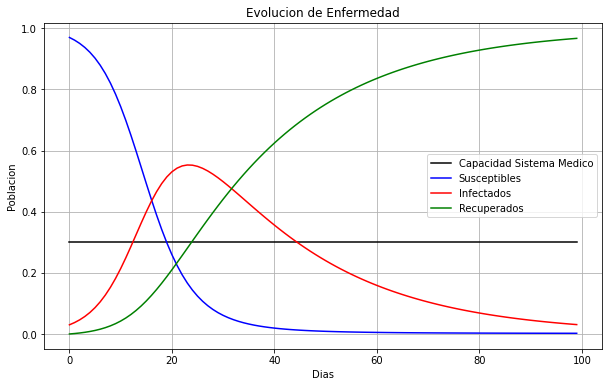

maximo de infectados 0.5528233567264866
maximo de infectados para que no sature el sistema medico es: 0.3


In [197]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

# Condiciones iniciales

S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1.0 #avanzamos de a 1 dia
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Pandemia con parametros del Ejercicio 
beta= 0.27
gamma = 0.043

Resultados = RK4(x , h, (0,100),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Pandemia con parametros del Ejercicio ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("maximo de infectados",max_infect)
print("maximo de infectados para que no sature el sistema medico es:", 0.3*T0)


Una forma de dismunuir la curva de infectados, seria bajando el nivel de contacto $\beta$

Esto se debe a que al haber menor numero de contacto en la población, esta se infecta a un paso mucho menor, lo cual logra el objetivo de no saturar la capacidad del sistema medico.


Grafico Evolución de Pandemia con parametros modificados 


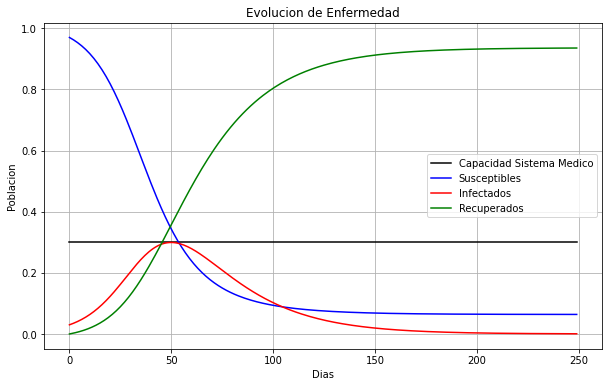

maximo de infectados 0.2993895030593585
maximo de infectados para que no sature el sistema medico es: 0.3


In [198]:
import numpy as np
# Condiciones iniciales
S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1.0
N = round((250-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

# Grafico Evolución de Pandemia con parametros del Ejercicio 
beta = 0.125
gamma = 0.043

Resultados = RK4(x , h, (0,250),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("Grafico Evolución de Pandemia con parametros modificados ")

graficar_curvas(I,S,R,M)

#amplitud del pico
max_infect=max(I)
print("maximo de infectados",max_infect)
print("maximo de infectados para que no sature el sistema medico es:", 0.3*T0)

Con un valor de beta de $\beta$ = 0.125 el sistema medico no colapsa y la epidemia tendria una duracion de x

***
aca falta hacer algun codigo o algo para que me indique cuando llegan los infectados a 0 
tmbien tendria que tener una forma de chequear que la suma de S R e I sea siempre 1

#Graficos Con Nuevos Parametros

Pruebe con 3 distintos juegos de parámetros del modelo y comente los comportamientos explorados.


Modificamos los parametros ... y asi la duracion de la pandemia tal que el sistema medico no colapse seria...

CASO 1


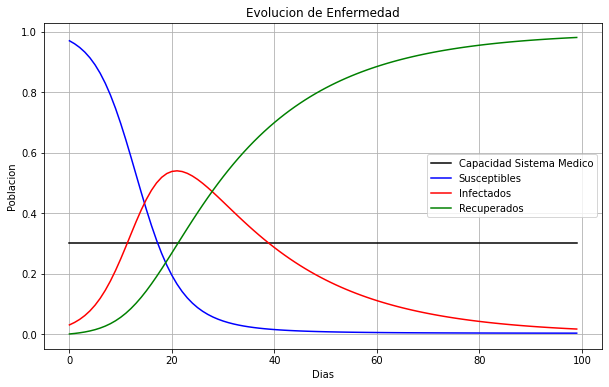

CASO 2


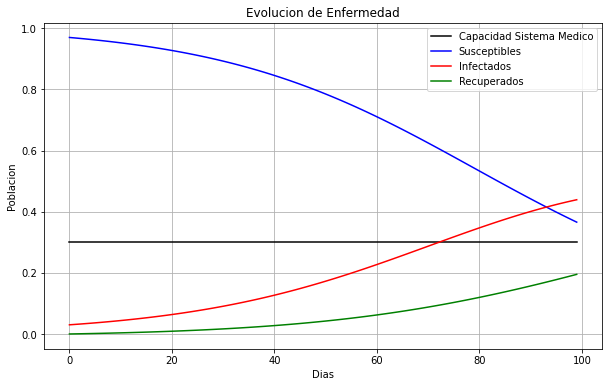

CASO 3


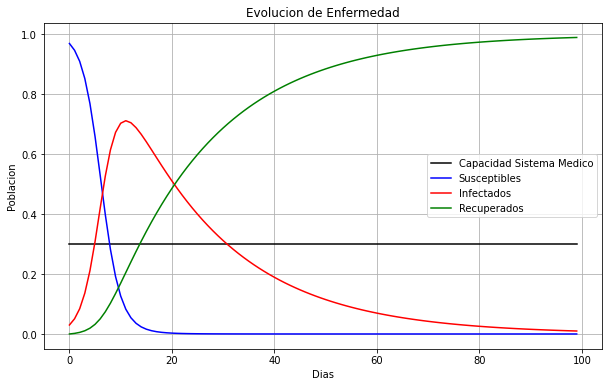

In [205]:
# Simulacion de un modelo de epidemias SIR
import numpy as np

S0=1-0.03
I0=0.03
R0 = 0
T0 = S0 + I0 + R0
x=[S0,I0,R0]
h = 1.0
N = round((100-0)/h) #Numero de pasos total 

Resultados =np.array(np.zeros((3, N)))

S=[]
I=[]
R=[]
M=[0.3*T0]*N

#------------------------------------------------------------

# Caso 1 
beta = 0.3
gamma = 0.05

Resultados = RK4(x , h, (0,100),beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 1")

graficar_curvas(I,S,R,M)


# Caso 2
beta = 0.05
gamma = 0.01

Resultados = RK4(x , h, (0,100),beta, gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 2")

graficar_curvas(I,S,R,M)


# Caso 3 
beta = 0.6
gamma = 0.05

Resultados = RK4(x , h, (0,100),beta,gamma)

S=Resultados[0]
I=Resultados[1]
R=Resultados[2]

print("CASO 3")

graficar_curvas(I,S,R,M)

##Analisis de cada uno de los casos

En el caso 1 con los parametros... se puede observar...